## Diego Fernando Valle Morales
## Carné 20003022

# Tarea 2

Empezamos cargando los datos del dataset fashion MNIST

In [1]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
#para los graficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.manifold import TSNE

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
imagen=np.reshape(train_images,(60000,784))

In [5]:
imagen.shape

(60000, 784)

In [6]:
x_std=StandardScaler().fit_transform(imagen)
x_std.shape

(60000, 784)

In [7]:
features=x_std.T
matriz_covarianza=np.cov(features)
print(matriz_covarianza)

[[1.00001667 0.32375858 0.10472712 ... 0.00322519 0.00655966 0.03258376]
 [0.32375858 1.00001667 0.56275636 ... 0.03621546 0.02953008 0.02061528]
 [0.10472712 0.56275636 1.00001667 ... 0.05237603 0.02799057 0.02434324]
 ...
 [0.00322519 0.03621546 0.05237603 ... 1.00001667 0.64794149 0.24133048]
 [0.00655966 0.02953008 0.02799057 ... 0.64794149 1.00001667 0.50141607]
 [0.03258376 0.02061528 0.02434324 ... 0.24133048 0.50141607 1.00001667]]


In [8]:
eigen_vals, eigen_vecs=np.linalg.eig(matriz_covarianza)

In [9]:
print("Eigenvectors \n%s" %eigen_vecs)

Eigenvectors 
[[ 1.78224194e-04  1.04521427e-05 -3.33640060e-04 ...  1.61412148e-03
  -6.32650500e-04  3.47803855e-05]
 [ 1.02295806e-03 -1.60487876e-03 -9.03903362e-04 ...  3.75630146e-04
   1.04649614e-03  7.35905674e-04]
 [ 2.18629740e-03 -1.39523495e-03 -2.77778568e-03 ... -7.05226256e-04
  -2.04000743e-04  1.14710671e-03]
 ...
 [ 6.32680223e-03 -1.39355770e-02 -9.45561135e-03 ... -1.25878982e-02
  -3.86426644e-03 -1.27070974e-02]
 [ 1.63273351e-03 -9.55521133e-03  1.29622634e-03 ...  2.85965247e-03
  -3.79946230e-03  2.90246415e-03]
 [ 7.79239732e-04 -4.30178911e-03  9.09684896e-04 ... -1.34421704e-03
   1.03353941e-03  3.18408145e-03]]


In [10]:
print("Eigen vals \n%s" %eigen_vals)

Eigen vals 
[1.73137896e+02 1.13012603e+02 4.28163365e+01 3.98959607e+01
 3.17908401e+01 2.36733644e+01 2.15410670e+01 1.81393468e+01
 1.32704963e+01 1.03336329e+01 9.17376265e+00 7.54506218e+00
 7.10661624e+00 6.75040337e+00 5.82527662e+00 5.72584171e+00
 5.18669801e+00 4.95116213e+00 4.87607894e+00 4.58085356e+00
 4.10343340e+00 4.00725656e+00 3.71256369e+00 3.52868326e+00
 3.43949691e+00 3.27000669e+00 3.12303695e+00 3.06192229e+00
 2.96094002e+00 2.92849545e+00 2.84689256e+00 2.75675535e+00
 2.63460955e+00 2.59449221e+00 2.57190118e+00 2.48928424e+00
 2.39285061e+00 2.32586007e+00 2.23204333e+00 2.21928761e+00
 2.16063196e+00 2.10221955e+00 2.05704119e+00 1.99554846e+00
 1.94060149e+00 1.88353239e+00 1.86575542e+00 1.79051386e+00
 1.74106688e+00 1.69390146e+00 1.65003154e+00 1.62447385e+00
 1.59068789e+00 1.57278982e+00 1.55916668e+00 1.52201618e+00
 1.47811201e+00 1.44984072e+00 1.41420988e+00 1.38678293e+00
 1.37072550e+00 1.34334980e+00 1.32729260e+00 1.28286002e+00
 1.26238820e

In [11]:
eigen_vals[0]/sum(eigen_vals)

0.22083547297081774

In [12]:
X_proyectado=x_std.dot(eigen_vecs.T[0])
X_proyectado

array([ -0.80117477,  17.07420598,  -9.60164085, ...,   9.37766441,
        -9.64563637, -21.31707928])

In [13]:
resultado=pd.DataFrame(X_proyectado, columns=['PC1'])
resultado['eje-Y']=0.0
resultado['label']=train_labels

In [14]:
resultado

,PC1,eje-Y,label
0,-0.801175,0.0,9
1,17.074206,0.0,0
2,-9.601641,0.0,0
3,-0.311206,0.0,3
4,8.963833,0.0,0
...,...,...,...
59995,-21.235640,0.0,5
59996,-0.780765,0.0,1
59997,9.377664,0.0,3
59998,-9.645636,0.0,0


Text(0.5, 1, 'RESULTADO DE APLICAR PCA')

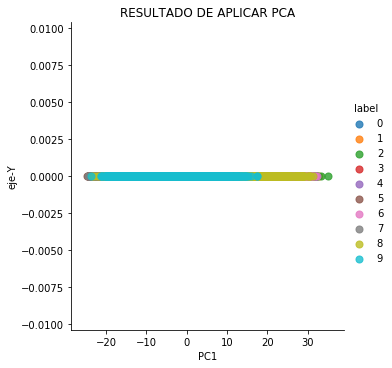

In [60]:
sns.lmplot('PC1', 
           'eje-Y', 
           data=resultado, 
           fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

# title
plt.title('RESULTADO DE APLICAR PCA')

#### Aplicando t-sne

In [ ]:
tsne=TSNE(n_components=2,
         n_iter=1000,
         perplexity=100,
         learning_rate=1000).fit_transform(imagen)

In [ ]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y

sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color